**Objetive.** In this tutorial we illustrate the use of several functions that are included in the package, and as running example we use the archifamous Van der Pol oscillator. If you are just interested to obtain the linearization, the function `linearize` may be relevant.

## Loading the model

To read a model from a text file, we use the function `load_model`. The output is a list: 
- $f$: vector field
- $n$: dimension of the state-space
- $k$: order of the system

The example model `vanderpol.sage` reads as follows:

```python
# Van der pol oscillator
# ======================

# dimension of state-space
n=2

# define the vector of symbolic variables
x = polygens(QQ, ['x'+str(1+i) for i in range(n)])

# vector field (n-dimensional)
f = [None] * n

f[0] = x[1]
f[1] = x[1] - x[0]^2*x[1] - x[0]
```

In [1]:
%display typeset

In [2]:
from carlin.io import load_model 

[f, n, k] = load_model('vanderpol.sage')
f, n, k

([x2, -x1^2*x2 - x1 + x2], 2, 3)

## Computing the linearization

We can compute the linearization for each integer order $N$ using the function `truncated_matrix`.

In [3]:
from carlin.transformation import truncated_matrix

N = 2
BN = truncated_matrix(N, 'vanderpol.sage')

Notice that $B_N$ is a *sparse* matrix:

In [4]:
type(BN)

<class 'scipy.sparse.coo.coo_matrix'>

The `coo` tag says that it is internally represented as a list of tuples of coordiantes of non-zero values. Indeed, if you try to print `BN`, it will return a long dictionary of `(tuples, values)`.

In general, the matrices in Carleman linearization are very sparse, because they arise as a recursion of tensor products with the identity and the canonical description of the system.

If we want to transform it into a usual matrix (so called dense matrices), we can use the `toarray()` method. This is the analogue of MATLAB's `full(..)` function.

In [5]:
matrix(BN.toarray())    # the matrix(..) transforms it into a sage matrix (optional)

[ 0.0  1.0  0.0  0.0  0.0  0.0]
[-1.0  1.0  0.0  0.0  0.0  0.0]
[ 0.0  0.0  0.0  1.0  1.0  0.0]
[ 0.0  0.0 -1.0  1.0  0.0  1.0]
[ 0.0  0.0 -1.0  0.0  1.0  1.0]
[ 0.0  0.0  0.0 -1.0 -1.0  2.0]

To export the linearization to an external MAT file, we can use the function `savemat`. Notice that other objects (possibly of different types) can be saved in the same MAT file, which will store them as a cell array. 

In [6]:
import scipy
from scipy.io import savemat

savemat('vanderpol.mat', {'model':'vanderpol', 'N':N, 'BN':BN})

This will generate the file `vanderpol.mat` in the working directory.

## Computing the error term

The error term is computed next. The interpretation is the following. Consider the inputs are the truncation order $N$, and an initial condition $x_0 \in \mathbb{R}^n$. The output is a function $\varepsilon(t)$ such that:
$$
x(t) \in \hat{x}(t) \oplus \varepsilon(t) \mathcal{B}^n_\infty, \qquad t \in I.
$$
Here the function $\varepsilon(t)$ has domain $[0,T^*] \subset \mathbb{R}^+$. The convergence radius $T^*$ is also given as an output. In the equation of above, $x(t)$ is the exact solution of the original system, and $\hat{x}(t)$ is the solution of the linear system
$$
\hat{x}'(t) = B_N \hat{x}(t),\qquad t \in I.
$$
The quantity $\mathcal{B}^n_\infty$ represents the unit ball in the $n$-dimensional space corresponding to the supremum norm.

The error function is
$$
\varepsilon(t) = \dfrac{||\tilde{x}_0|| e^{||\tilde{F}_1||t}}{(1+\beta_0) - \beta_0 e^{||\tilde{F}_1||t}}\left[ \beta_0 (e^{||\tilde{F}_1|| t} - 1 )\right]^N.
$$

As an example, below we compute the error for the truncation order $N=4$.

In [7]:
from carlin.transformation import error_function

N=4
x0 = [1, 1]

[Ts, eps] = error_function('vanderpol.sage', N, x0)

Let's check the convergence radius for the `\varepsilon(t)` function:

In [8]:
Ts

0.27465307216702745

The function $\varepsilon(t)$ is *increasing*, so $\varepsilon(t) \leq \varepsilon(T)$. The formula is:

In [9]:
eps

1.0*(0.5*e^(4.0*t) - 0.5)^4*e^(4.0*t)/(-0.5*e^(4.0*t) + 1.5)

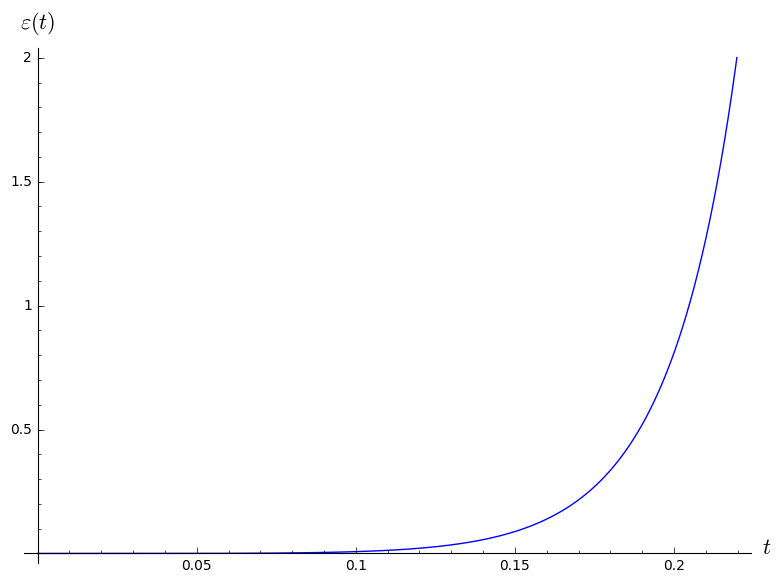

In [19]:
P = plot(eps, 0, Ts*0.8)

P.axes_labels(["$t$", r"$\varepsilon(t)$"])
P.show()

## Exporting the linearization and the quadratic reduction 

We can as well use the `linearize` function which does the job of computing Carleman linearization to order $N$ and building the quadratic reduction. 

Here is an example:

In [20]:
# order
N = 4

# initial condition, x(0) = x0
x0 = [0.5, 0.5]

# set model filename, it should be in the working folder of the calling script
model_filename = 'vanderpol.sage'

# set target filename
target_filename = 'vanderpol_N_4.mat'

In [21]:
from carlin.transformation import linearize

linearize(model_filename, target_filename, N, x0)

Obtaining the canonical representation... done
Computing matrix BN... done
Computing the quadratic reduction... done
Computing the characteristics of the model... done
Exporting to  vanderpol_N_4.mat ... done


This produces the file `vanderpol_N_4.mat`, which can be opened in Sage with `loadmat`, or in other platforms eg. in MATLAB with the `load(..)` command.